In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

In [14]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.measure import shannon_entropy

In [15]:
def calculate_metrics(vi, ir,fusion):
    # Information Entropy (EN)
    def calculate_entropy(fusion):
        img_gray = cv2.cvtColor(fusion, cv2.COLOR_BGR2GRAY)
        entropy_value = shannon_entropy(img_gray)
        return entropy_value

    # Standard Deviation (SD)
    def calculate_sd(fusion):
        img_gray = cv2.cvtColor(fusion, cv2.COLOR_BGR2GRAY)
        sd_value = np.std(img_gray)
        return sd_value

    # Structural Similarity Index (SSIM)
    def calculate_ssim(vi, ir ,fusion):
        img1_gray = cv2.cvtColor(vi, cv2.COLOR_BGR2GRAY)
        img2_gray = cv2.cvtColor(ir, cv2.COLOR_BGR2GRAY)
        fusion_gray = cv2.cvtColor(fusion, cv2.COLOR_BGR2GRAY)
        ssim_index_A, _ = ssim(img1_gray, fusion_gray, full=True)
        ssim_index_B, _ = ssim(img2_gray, fusion_gray, full=True)
        return (ssim_index_A + ssim_index_B)/2 

    

    # Correlation Coefficient (CC)
    def calculate_cc(vi, ir ,fusion):
        img1_flat = vi.flatten()
        img2_flat = ir.flatten()
        fusion_flat = fusion.flatten()
        
        correlation_coefficient_A = np.corrcoef(img1_flat, fusion_flat)[0, 1]
        correlation_coefficient_B = np.corrcoef(img2_flat, fusion_flat)[0, 1]
        
        return (correlation_coefficient_A + correlation_coefficient_B)/2

    # Spatial Frequency (SF)
    def calculate_sf(fusion):
        img_gray = cv2.cvtColor(fusion, cv2.COLOR_BGR2GRAY)
        f = np.fft.fft2(img_gray)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20 * np.log(np.abs(fshift))
        spatial_frequency = np.sum(magnitude_spectrum) / img_gray.size
        return spatial_frequency

    # Variable Luminance Fusion Index (VLF)
    def calculate_vlf(vi, ir ,fusion):
        img1_gray = cv2.cvtColor(vi, cv2.COLOR_BGR2GRAY)
        img2_gray = cv2.cvtColor(ir, cv2.COLOR_BGR2GRAY)
        fusion_gray = cv2.cvtColor(fusion, cv2.COLOR_BGR2GRAY)
        
        vlf_value_A = np.sum(np.abs(img1_gray - fusion_gray)) / img1_gray.size
        vlf_value_B = np.sum(np.abs(img2_gray - fusion_gray)) / img2_gray.size
        
        return (vlf_value_A + vlf_value_B)/2

    # Calculate metrics
    entropy_value = calculate_entropy(fusion)
    sd_value = calculate_sd(fusion)
    ssim_value = calculate_ssim(vi, ir,fusion)
    cc_value = calculate_cc(vi, ir,fusion)
    sf_value = calculate_sf(fusion)
    vlf_value = calculate_vlf(vi, ir,fusion)
    return {
        'Entropy': entropy_value,
        'Standard Deviation': sd_value,
        'SSIM': ssim_value,
        'Correlation Coefficient': cc_value,
        'Spatial Frequency': sf_value,
        'Variable Luminance Fusion Index': vlf_value
    }

In [16]:
train_irimgs_path = glob.glob('data/TNO/ir/*.png')
train_viimgs_path = glob.glob('data/TNO/vi/*.png')

In [17]:
train_irimgs_path[0]

'data/TNO/ir/01.png'

In [18]:
img1 = cv2.imread(train_irimgs_path[30])
img2 = cv2.imread(train_viimgs_path[30])

In [19]:
img1.shape

(450, 620, 3)

In [23]:
res={}

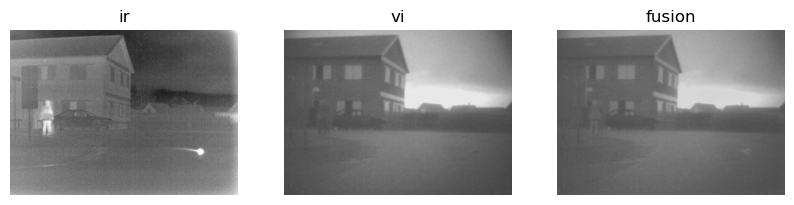

w= 0.1 +++++++++
 {'Entropy': 6.485013855933334, 'Standard Deviation': 34.202985250549666, 'SSIM': 0.7770506915750941, 'Correlation Coefficient': 0.13518647814063173, 'Spatial Frequency': 132.0765417119531, 'Variable Luminance Fusion Index': 117.25405017921148}


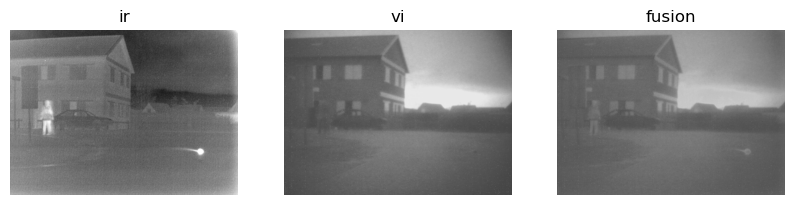

w= 0.2 +++++++++
 {'Entropy': 6.250151179255757, 'Standard Deviation': 28.21706401137464, 'SSIM': 0.8012927186933831, 'Correlation Coefficient': 0.15870688969523356, 'Spatial Frequency': 131.14958444114077, 'Variable Luminance Fusion Index': 121.47797849462366}


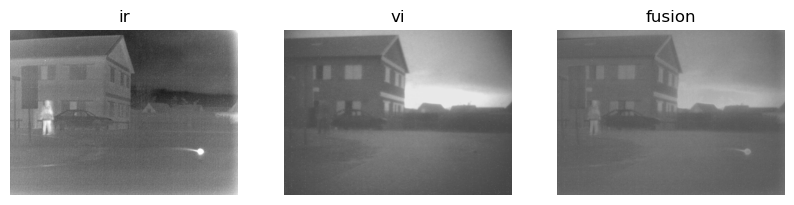

w= 0.3 +++++++++
 {'Entropy': 6.005440429892535, 'Standard Deviation': 22.472398099961442, 'SSIM': 0.8180878737407691, 'Correlation Coefficient': 0.19277742145641769, 'Spatial Frequency': 130.87918862436274, 'Variable Luminance Fusion Index': 123.6616164874552}


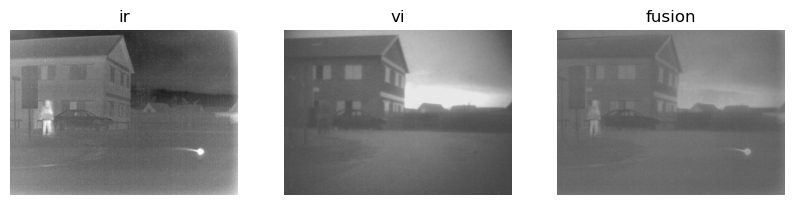

w= 0.4 +++++++++
 {'Entropy': 5.7538935345967595, 'Standard Deviation': 17.2351435712771, 'SSIM': 0.8275367794390456, 'Correlation Coefficient': 0.24296540201410746, 'Spatial Frequency': 130.9406869288723, 'Variable Luminance Fusion Index': 124.62986021505377}


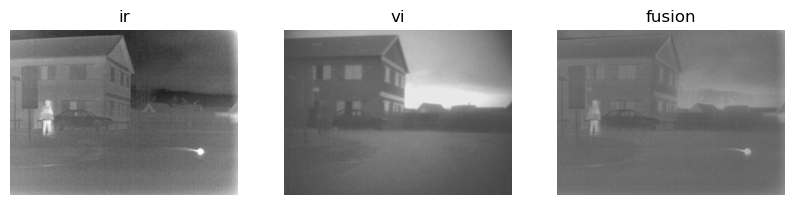

w= 0.5 +++++++++
 {'Entropy': 5.322104846415504, 'Standard Deviation': 13.100121428691958, 'SSIM': 0.8293032301040013, 'Correlation Coefficient': 0.3085205478491945, 'Spatial Frequency': 131.76127085984837, 'Variable Luminance Fusion Index': 125.63975627240144}


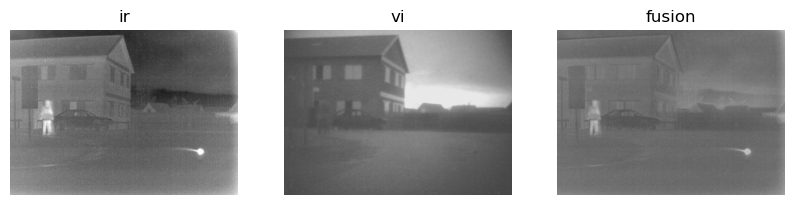

w= 0.6 +++++++++
 {'Entropy': 5.375547371094816, 'Standard Deviation': 11.350430059342829, 'SSIM': 0.8251724960186528, 'Correlation Coefficient': 0.34324340253139835, 'Spatial Frequency': 132.01930788758048, 'Variable Luminance Fusion Index': 126.6263405017921}


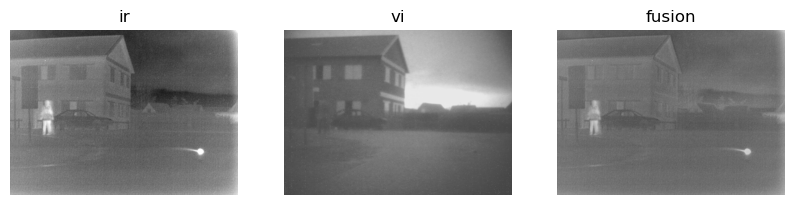

w= 0.7 +++++++++
 {'Entropy': 5.556477140285499, 'Standard Deviation': 12.995738873138947, 'SSIM': 0.8142528393263344, 'Correlation Coefficient': 0.2886452231808573, 'Spatial Frequency': 133.01158784531222, 'Variable Luminance Fusion Index': 127.59691039426522}


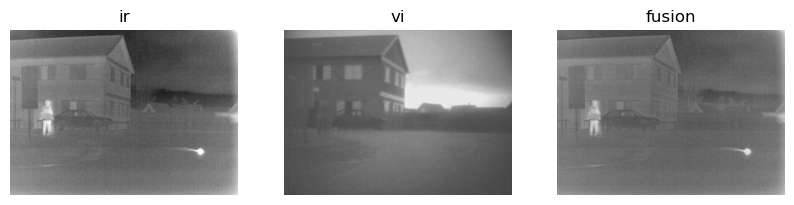

w= 0.8 +++++++++
 {'Entropy': 6.003861666264365, 'Standard Deviation': 17.07801995433174, 'SSIM': 0.7974302448296704, 'Correlation Coefficient': 0.21110534853536433, 'Spatial Frequency': 134.00886845397423, 'Variable Luminance Fusion Index': 127.44623655913978}


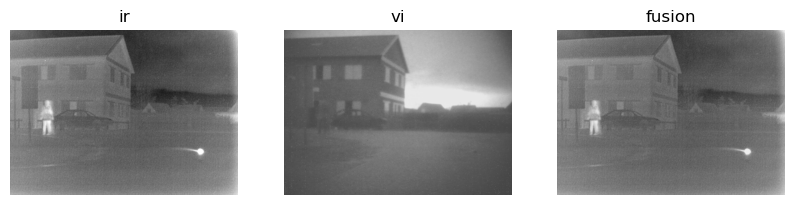

w= 0.9 +++++++++
 {'Entropy': 6.429059630276353, 'Standard Deviation': 22.296300199266575, 'SSIM': 0.7747180014732868, 'Correlation Coefficient': 0.1551661959443778, 'Spatial Frequency': 135.35814837939975, 'Variable Luminance Fusion Index': 125.78825448028675}


In [24]:
w = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for ws in w:

    # 图像融合
    combine = cv2.addWeighted(img1,ws,img2,1-ws,0)
    ir = img1
    vi = img2
    plt.figure(figsize=(10,10))
    display_list = [ir,vi,combine]
    title = ['ir','vi','fusion']
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.title(title[i])
        plt.imshow(display_list[i], vmin=0, vmax=255)
        plt.axis('off')
    plt.show()
    fusion_result = calculate_metrics(vi,ir,combine)
    print("w=",ws,"+++++++++\n",fusion_result)
    res[ws]=fusion_result

In [10]:
vi.shape,ir.shape,combine.shape

((450, 620, 3), (450, 620, 3), (450, 620, 3))

{'Entropy': 5.322104846415504, 'Standard Deviation': 13.100121428691958, 'SSIM': 0.8293032301040013, 'Correlation Coefficient': 0.3085205478491945, 'Spatial Frequency': 131.76127085984837, 'Variable Luminance Fusion Index': 125.63975627240144}


In [17]:
import numpy as np
from PIL import Image
import os
import torch
import cv2
def save_images_from_tensors(tensor_batch1, tensor_batch2, tensor_batch3, batch_number):
    # 检查是否有必要创建文件夹
    batch_folder = f"batch-{batch_number}"
    if not os.path.exists(batch_folder):
        os.makedirs(batch_folder)

    
    # 提取第一张图片
    image1 = tensor_batch1[0].cpu().permute(1,2,0)
    image2 = tensor_batch2[0].cpu().permute(1,2,0)
    image3 = tensor_batch3[0].cpu().permute(1,2,0)

    # 将张量转换为数组
    image_array1 = np.array(image1)
    image_array2 = np.array(image2)
    image_array3 = np.array(image3)

    print(image_array1.shape)
    # 保存图片
    cv2.imwrite(os.path.join("exp/result"+batch_folder, f"visible_light-{batch_number}.png"), image_array1)
    cv2.imwrite(os.path.join(batch_folder, f"infrared_light-{batch_number}.png"), image_array2)
    cv2.imwrite(os.path.join(batch_folder, f"fused_image-{batch_number}.png"), image_array3)


# 假设你有一个张量tensor_batch1，其形状为(32, 1, 256, 256)
# 你可以像这样调用函数：

In [18]:
tensor_batch1 = torch.randn(32, 1, 256, 256)
tensor_batch2 = torch.randn(32, 1, 256, 256)
tensor_batch3 = torch.randn(32, 1, 256, 256)

In [19]:
save_images_from_tensors(tensor_batch1, tensor_batch2, tensor_batch3, 1)

(256, 256, 1)
